In [43]:
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import edward2 as ed
import warnings

plt.style.use("ggplot")
warnings.filterwarnings('ignore')

In [44]:
frequencies = np.loadtxt('/Users/Rhys/Documents/PhD/Maths_docs/PyMC3/frequencies_test.txt')
frequencies.shape

(8193,)

In [2]:
def lambda0(neta , mass):        
    return 3/(128 * neta * (np.pi*mass)**(5/3))

In [3]:
def phase(tc , phic , f, neta , mass ):
    rh_term = lambda0(neta , mass)*f**(-4/3)
    return 2*np.pi*f*tc + phic + rh_term

In [5]:
def strain(amplitude , mass , distance, neta , f ,tc , phic ):
    exponent = 1j*phase(tc, phic, f, neta ,lambda0(neta, mass)) + 1j*(np.pi/4) 
    return (amplitude * mass**(5/6))/(distance*np.pi**(2/3))* ((5*neta)/(24))**(-7/6)*np.exp(exponent)

In [48]:
def waveform_model(amplitude , mass_prior , distance, neta_prior , f ,tc , phic):
    neta = ed.Normal(loc=neta_prior, scale=0.5, name="neta")
    mass = ed.Normal(loc=mass_prior , scale=50, name="mass")
    lambda0 = 3/(128 * neta * (np.pi*mass)**(5/3))
    rh_term = lambda0(neta , mass)*f**(-4/3)
    phase = 2*np.pi*f*tc + phic + rh_term
    exponent = 1j*phase(tc, phic, f, neta ,lambda0(neta, mass)) + 1j*(np.pi/4) 
    strain = (amplitude * mass**(5/6))/(distance*np.pi**(2/3))* ((5*neta)/(24))**(-7/6)*np.exp(exponent) 
    return strain 

In [49]:
model_template = tf.make_template("waveform_model", waveform_model)
log_joint = ed.make_log_joint_fn(model_template)

In [ ]:
def target_log_prob_fn(avg_effect, avg_stddev, school_effects_standard):
  """Unnormalized target density as a function of states."""
  return log_joint(out
      num_schools=num_schools,
      treatment_stddevs=treatment_stddevs,
      avg_effect=avg_effect,
      avg_stddev=avg_stddev,
      school_effects_standard=school_effects_standard,
      treatment_effects=treatment_effects)

In [40]:
waveform = strain(10**-3, 30 , 1 , 0.25 , 2*frequencies , 10**-10 , 1)


/Users/Rhys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/Users/Rhys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


/Users/Rhys/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


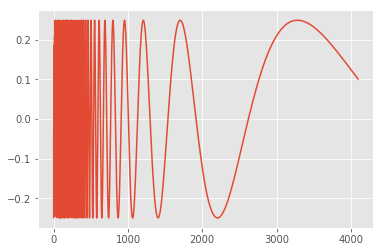

In [42]:
plt.plot(2*frequencies,waveform)
plt.show()